# 1. Bar chart with gradients
Matplotlib는 기본적으로 그라데이션을 지원하지 않습니다. 그러나 우리는 올바른 크기와 색상의 AexsImage를 사용하여 그라데이션으로 채워진 직사각형을 흉내낼 수 있습니다. <br/>
<br/>

특히, 컬러맵을 사용하여 실제 색상을 생성합니다. 그런 다음 양선형 보간을 사용하여 영역을 채우기만 하면 됩니다. 그라데이션 방향은 단위 벡터 v에 의해 정의됩니다. 코너 벡터들의 v에 대한 사영의 길이로 코너의 값들을 얻을 수 있습니다. <br/>
<br/>

Axes의 그라데이션 배경을 생성하는 데에도 비슷한 접근 방식을 사용할 수 있습니다. 이 경우 데이터 좌표에 독립적이 되도록 Axes 좌표 (extent = (0, 1, 0, 1), transform = ax.transAxes)를 사용하는 것이 도움이 됩니다.

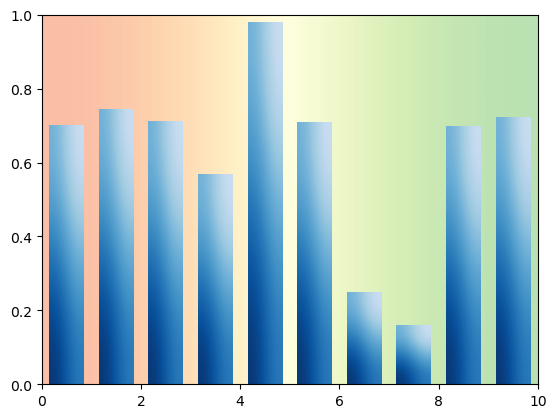

In [1]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(19680801)

def gradient_image(ax, direction = 0.3, cmap_range = (0, 1), **kwargs):
    """
    Draw a gradient image based on a colormap.

    Parameters
    ----------
    ax: Axes
        The axes to draw on.
    direction: float
        The direction of the gradient. This is a number in
        range 0 (=vertical) to 1 (=horizontal).
    cmap_range: float, float
        The fraction (cmin, cmax) of the colormap that should be
        used for the gradient, where the complete colormap is (0, 1).
    **kwargs
        Other parameters are passed on to `.Axes.imshow()`.
        In particular, *cmap*, *extent*, and *transform* may be useful.
    """
    
    phi = direction * np.pi / 2
    v = np.array([np.cos(phi), np.sin(phi)])
    X = np.array([[v @ [1, 0], v @ [1, 1]],
                  [v @ [0, 0], v @ [0, 1]]])
    a, b = cmap_range
    X = a + (b - a) / X.max() * X
    im = ax.imshow(X, interpolation = 'bicubic', clim = (0, 1),
                   aspect = 'auto', **kwargs)
    return im

def gradient_bar(ax, x, y, width = 0.5, bottom = 0):
    for left, top in zip(x, y):
        right = left + width
        gradient_image(ax, extent = (left, right, bottom, top),
                       cmap = plt.cm.Blues_r, cmap_range = (0, 0.8))
        
fig, ax = plt.subplots()
ax.set(xlim = (0, 10), ylim = (0, 1))

# background image
gradient_image(ax, direction = 1, extent = (0, 1, 0, 1), transform = ax.transAxes,
               cmap = plt.cm.RdYlGn, cmap_range = (0.2, 0.8), alpha = 0.5)

N = 10
x = np.arange(N) + 0.15
y = np.random.rand(N)
gradient_bar(ax, x, y, width = 0.7)
plt.show()

# 2. Hat graph

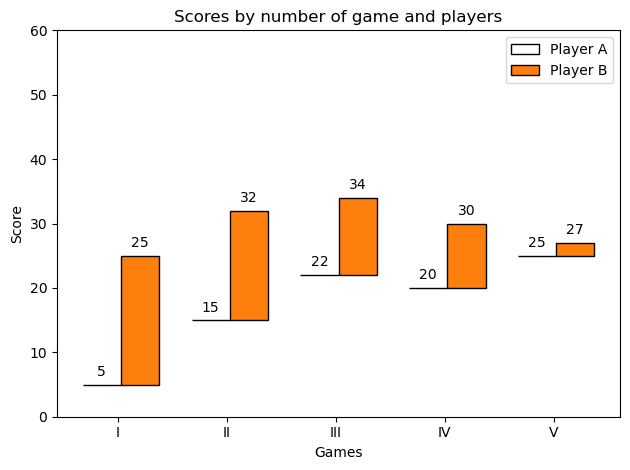

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def hat_graph(ax, xlabels, values, group_labels):
    """
    Create a hat graph.

    Parameters
    ----------
    ax: matplotlib.axes.Axes
        The Axes to plot into.
    xlabels: list of str
        The category names to be displayed on the x-axis.
    values: (M, N) array-like
        The data values.
        Rows are the groups (len(group_labels) == M).
        Columns are the categories (len(xlabels) == N).
    group_labels: list of str
        The group labels displayed in the legend.
    """

    def label_bars(heights, rects):
        """ Attach a text label on top of each bar. """
        for height, rect in zip(heights, rects):
            ax.annotate(f'{height}',
                        xy = (rect.get_x() + rect.get_width() / 2, height),
                        xytext = (0, 4), # 4 points vertical offset.
                        textcoords = 'offset points',
                        ha = 'center', va = 'bottom')
    values = np.asarray(values)
    x = np.arange(values.shape[1])
    ax.set_xticks(x, labels = xlabels)
    spacing = 0.3 # spacing between hat groups
    width = (1 - spacing) / values.shape[0]
    heights0 = values[0]
    for i, (heights, group_label) in enumerate(zip(values, group_labels)):
        style = {'fill': False} if i == 0 else {'edgecolor': 'black'}
        rects = ax.bar(x - spacing / 2 + i * width, heights - heights0,
                       width, bottom = heights0, label = group_label, **style)
        label_bars(heights, rects)

# initialise labels and a numpy array make sure you have
# N labels of N number of values in the array
xlabels = ['I', 'II', 'III', 'IV', 'V']
playerA = np.array([5, 15, 22, 20, 25])
playerB = np.array([25, 32, 34, 30, 27])

fig, ax = plt.subplots()
hat_graph(ax, xlabels, [playerA, playerB], ['Player A', 'Player B'])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Games')
ax.set_ylabel('Score')
ax.set_ylim(0, 60)
ax.set_title('Scores by number of game and players')
ax.legend()

fig.tight_layout()
plt.show()

# 3. Discrete distribution as horizontal bar chart
스택 막대 차트는 이산적인 분포를 시각화하는 데 사용할 수 있습니다. <br/>
<br/>

이 예제는 사람들이 다섯 항목 척도로 질문에 동의 여부를 평가할 수 있는 설문 조사 결과를 시각화합니다. <br/>
<br/>

수평 스택은 각 범주에 대해 barh()를 호출하고 이미 그려진 막대들의 누적 합을 left 매개변수를 통해 시작점으로 전달하여 달성됩니다.

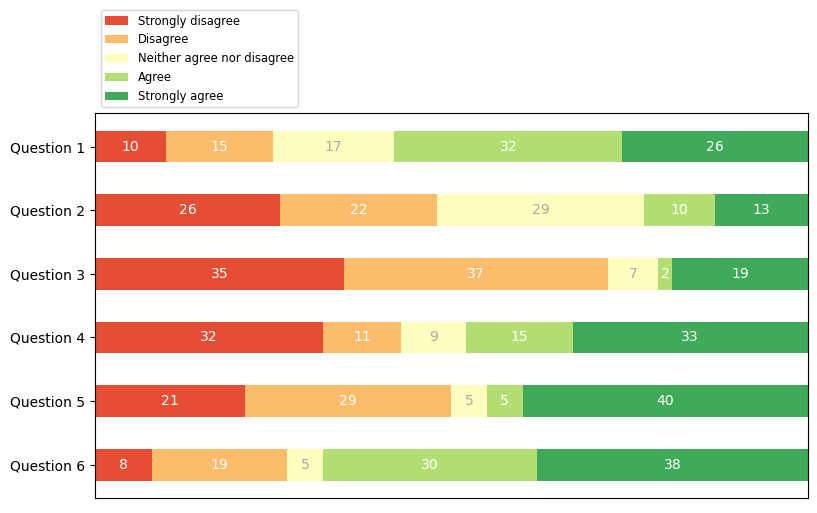

In [5]:
import numpy as np
import matplotlib.pyplot as plt

category_names = ['Strongly disagree', 'Disagree',
                  'Neither agree nor disagree', 'Agree', 'Strongly agree']

results = {
    'Question 1': [10, 15, 17, 32, 26],
    'Question 2': [26, 22, 29, 10, 13],
    'Question 3': [35, 37, 7, 2, 19],
    'Question 4': [32, 11, 9, 15, 33],
    'Question 5': [21, 29, 5, 5, 40],
    'Question 6': [8, 19, 5, 30, 38]
}

def survey(results, category_names):
    """
    Parameters
    ----------
    results: dict
        A mapping from question labels to a list of answers per category.
        It is assumed all list contain the same number of entries and that
        it matches the length of *category_names*.
    category_names: list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis = 1)
    category_colors = plt.colormaps['RdYlGn'](
        np.linspace(0.15, 0.85, data.shape[1]))
    
    fig, ax = plt.subplots(figsize = (9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis = 1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left = starts, height = 0.5,
                        label = colname, color = color)
        
        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type = 'center', color = text_color)
    ax.legend(bbox_to_anchor = (0, 1),
              loc = 'lower left', fontsize = 'small')
    
    return fig, ax

survey(results, category_names)
plt.show()

# 4. JoinStyle
Matplotlib이 두 개의 다른 선이 만나는 꼭지점을 어떻게 그리는지 제어합니다.

C:\Users\YONSAI\AppData\Local\Temp\ipykernel_16132\1783886713.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  JoinStyle.demo()


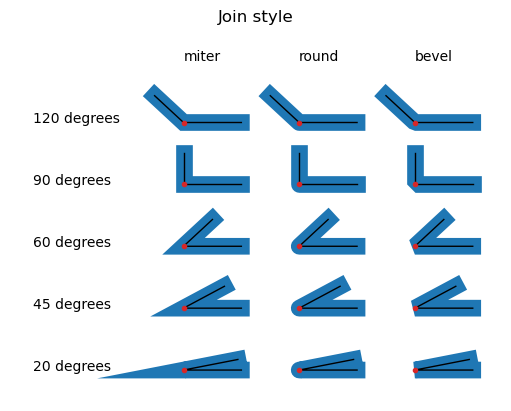

In [6]:
import matplotlib.pyplot as plt
from matplotlib._enums import JoinStyle

JoinStyle.demo()
plt.show()

# 5. Customizing dashed line styles
선의 대시는 대시 시퀀스를 통해 제어됩니다. Line2D.set_dashes를 사용하여 수정할 수 있습니다. <br/>
<br/>

대시 시퀀스는 포인트 단위의 온/오프 길이의 연속입니다. 예를 들어, [3, 1]은 3포인트 길이의 선과 1포인트 공백으로 구성됩니다. <br/>
<br/>

Axes.plot과 같은 일부 함수는 키워드 인자로 Line 속성을 전달할 수 있습니다. 이 경우, 선을 생성할 때 이미 대시 스타일을 설정할 수 있습니다.

대시의 다른 속성들은 set_dash_capstyle, set_dash_joinstyle, set_gapcolor와 같은 관련 메서드를 사용하거나 플로팅 함수를 통해 속성을 전달함으로써 설정할 수도 있습니다.

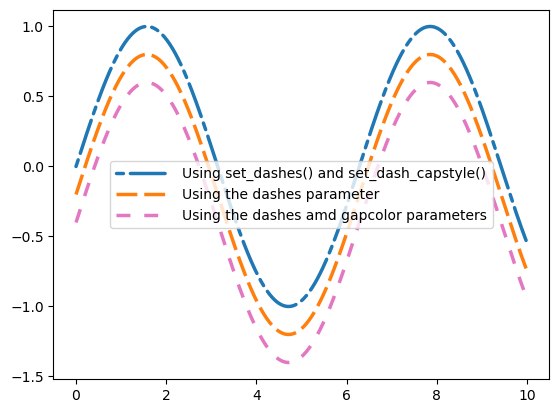

In [16]:
import numpy as np
import matplotlib

x = np.linspace(0, 10, 500)
y = np.sin(x)

plt.rc('lines', linewidth = 2.5)
fig, ax = plt.subplots()

# Using set_dashes() and set_capstyle() to modify dashing of an existing line.
line1, = ax.plot(x, y, label = 'Using set_dashes() and set_dash_capstyle()')
line1.set_dashes([2, 2, 10, 2]) # 2pt line, 2pt break, 10pt line, 2pt break.
line1.set_dash_capstyle('round')

# Using plot(..., dashes = ...) to set the dashing when creating a line.
line2, = ax.plot(x, y - 0.2, dashes = [6, 2], label = 'Using the dashes parameter')

# Using plot(..., dashes = ..., gapcolor = ...) to set the dashing and
# alternating color when creating a line.
line3, = ax.plot(x, y - 0.4, dashes = [4, 4], color = 'tab:pink',
                 label = 'Using the dashes amd gapcolor parameters')

ax.legend(handlelength = 4)
plt.show()